# Capstone Project 3 - Sentiment Analysis for Uber News

## Introduction

- Sentiment analysis is a kind of data mining where you measure the inclination of people’s opinions by using NLP (natural language processing), text analysis, and computational linguistics. 
 
- This project will utilize web scraping, data analysis, manipulation, and visualization skills to build a complete sentiment analysis tool on the Uber news.


## How to acquire the data
- I will use Beautifulsoup in Python to scrape article from the Uber news link.

## Roadmap for the project
1. I will use **Beautifulsoup** in Python to scrape Uber news article.
2. Then, I will use **Pandas** (Python Data Analysis Library) to analyze and run **sentiment analysis** on the article headlines.
3. Finally, I will use **Matplotlib for visualization** of our results.

## Data - Beautifulsoup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://investor.uber.com/news-events/news/press-release-details/2020/Uber-Announces-Results-for-Second-Quarter-2020/default.aspx"

In [3]:
response = requests.get(url)

In [4]:
# Remove HTML Tags

soup = BeautifulSoup(response.content, "html.parser")

In [5]:
soup.prettify()

'<!DOCTYPE HTML>\n<html lang="en-US" xml:lang="en-US" xmlns="http://www.w3.org/1999/xhtml">\n <head>\n  <title>\n   Uber Technologies, Inc.  - Uber Announces Results for Second Quarter 2020\n  </title>\n  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>\n  <meta content="RevealTrans(Duration=0,Transition=0)" http-equiv="Page-Enter"/>\n  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>\n  <script type="text/javascript">\n   window.NREUM||(NREUM={});NREUM.info = {"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"4b6f7f959c","applicationID":"229922501","transactionName":"b1xWMUIDWBdWARFYX1YWdTZgTVIBUQMQXUQWWEcVSA==","queueTime":0,"applicationTime":1396,"agent":"","atts":""}\n  </script>\n  <script type="text/javascript">\n   (window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:false}};(window.NREUM||(NREUM={})).loader_config={xpid:"VQYBUlRVChACVlhbBQMCVlU=",licenseKey:"4b6f7f959c",applicationID:"229922501"};window.NREUM||(NREU

## Data Preprocessing

1. Tokenization
2. Remove Special Characters
3. Remove Numbers
4. Remove Punctuation
5. Stemming
6. Remove Stop Words
7. Remove extra whitespaces and tabs

In [6]:
dos_text = soup.get_text()

In [7]:
dos_text

'\n\n\r\n\tUber Technologies, Inc.  - Uber Announces Results for Second Quarter 2020\r\nwindow.NREUM||(NREUM={});NREUM.info = {"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"4b6f7f959c","applicationID":"229922501","transactionName":"b1xWMUIDWBdWARFYX1YWdTZgTVIBUQMQXUQWWEcVSA==","queueTime":0,"applicationTime":1396,"agent":"","atts":""}(window.NREUM||(NREUM={})).init={privacy:{cookies_enabled:false}};(window.NREUM||(NREUM={})).loader_config={xpid:"VQYBUlRVChACVlhbBQMCVlU=",licenseKey:"4b6f7f959c",applicationID:"229922501"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);return r}({1:[function(t,e,n){function r(t){try{c.console&&console.log(t)}catch(e){}}var i,o=t("ee"),a=t(23),c={};try{i=localStorage.getItem("__nr_flags"

## Removing Special Characters

In [8]:
import re

# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s\n]' 
    return re.sub(pat, '', text)

In [9]:
re_char = remove_special_characters(dos_text)

In [10]:
len(dos_text)

121383

In [11]:
len(remove_special_characters(dos_text))

114124

## Removing Numbers

In [16]:
def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)

In [17]:
re_num = remove_numbers(re_char)

In [18]:
len(re_num)

110877

In [19]:
re_num

'\n\n\r\n\tUber Technologies, Inc.   Uber Announces Results for Second Quarter \r\nwindow.NREUMNREUM;NREUM.info  "beacon":"bam.nrdata.net","errorBeacon":"bam.nrdata.net","licenseKey":"bffc","applicationID":"","transactionName":"bxWMUIDWBdWARFYXYWdTZgTVIBUQMQXUQWWEcVSA","queueTime":,"applicationTime":,"agent":"","atts":""window.NREUMNREUM.initprivacy:cookies_enabled:false;window.NREUMNREUM.loader_configxpid:"VQYBUlRVChACVlhbBQMCVlU",licenseKey:"bffc",applicationID:"";window.NREUMNREUM,__nr_requirefunctiont,e,nfunction rnif!e[n]var ie[n]exports:;t[n][].calli.exports,functionevar it[n][][e];return rie,i,i.exportsreturn e[n].exportsif"function"typeof __nr_requirereturn __nr_require;forvar i;in.length;irn[i];return r:[functiont,e,nfunction rttryc.consoleconsole.logtcatchevar i,ot"ee",at,c;tryilocalStorage.getItem"__nr_flags".split",",console"function"typeof console.logc.console!,i.indexOf"dev"!c.dev!,i.indexOf"nr_dev"!c.nrDev!catchsc.nrDevo.on"internalerror",functiontrt.stack,c.devo.on"fner

## Removing Punctuation

Removing punctuation can be achieved by using "string.punctuation" and keeping everything which is not in this list.

In [20]:
# function to remove punctuation
import string

def remove_punctuation(text):
    text = ''.join([c for c in text if c not in string.punctuation])
    return text

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
re_punc = remove_punctuation(re_num)

In [23]:
len(re_punc)

103959

In [24]:
re_punc

'\n\n\r\n\tUber Technologies Inc   Uber Announces Results for Second Quarter \r\nwindowNREUMNREUMNREUMinfo  beaconbamnrdataneterrorBeaconbamnrdatanetlicenseKeybffcapplicationIDtransactionNamebxWMUIDWBdWARFYXYWdTZgTVIBUQMQXUQWWEcVSAqueueTimeapplicationTimeagentattswindowNREUMNREUMinitprivacycookiesenabledfalsewindowNREUMNREUMloaderconfigxpidVQYBUlRVChACVlhbBQMCVlUlicenseKeybffcapplicationIDwindowNREUMNREUMnrrequirefunctiontenfunction rnifenvar ienexportstncalliexportsfunctionevar itnereturn rieiiexportsreturn enexportsiffunctiontypeof nrrequirereturn nrrequireforvar iinlengthirnireturn rfunctiontenfunction rttrycconsoleconsolelogtcatchevar ioteeatctryilocalStoragegetItemnrflagssplitconsolefunctiontypeof consolelogcconsoleiindexOfdevcdeviindexOfnrdevcnrDevcatchscnrDevooninternalerrorfunctiontrtstackcdevoonfnerrfunctiontenrnstackcdevrNR AGENT IN DEVELOPMENT MODErflags acfunctiontereturn tjoin functiontenfunction rtenrctryppicnew UncaughtExceptiontencatchftryoierrfsnowcatchdreturnfunctiont

In [31]:
re_line = re_punc.replace("\n", "")

## Stemming

Stemming is the process of reducing inflected/derived words to their word stem, base or root form. The stem need not be identical to original word. There are many ways to perform stemming such as lookup table, suffix-stripping algorithms etc. These mainly rely on chopping-off ‘s’, ‘es’, ‘ed’, ‘ing’, ‘ly’ etc from the end of the words and sometimes the conversion is not desirable. But nonetheless, stemming helps us in standardizing text.

For example, connection, connected, connecting word reduce to a common word "connect".

In [32]:
# function for stemming
import nltk

def get_stem(text):
    stemmer = nltk.porter.PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

In [33]:
stem_text = get_stem(re_line)

In [34]:
len(stem_text)

72541

In [35]:
stem_text

'uber technolog inc uber announc result for second quarter windownreumnreumnreuminfo beaconbamnrdataneterrorbeaconbamnrdatanetlicensekeybffcapplicationidtransactionnamebxwmuidwbdwarfyxywdtzgtvibuqmqxuqwwecvsaqueuetimeapplicationtimeagentattswindownreumnreuminitprivacycookiesenabledfalsewindownreumnreumloaderconfigxpidvqybulrvchacvlhbbqmcvlulicensekeybffcapplicationidwindownreumnreumnrrequirefunctiontenfunct rnifenvar ienexportstncalliexportsfunctionevar itnereturn rieiiexportsreturn enexportsiffunctiontypeof nrrequirereturn nrrequireforvar iinlengthirnireturn rfunctiontenfunct rttrycconsoleconsolelogtcatchevar ioteeatctryilocalstoragegetitemnrflagssplitconsolefunctiontypeof consolelogcconsoleiindexofdevcdeviindexofnrdevcnrdevcatchscnrdevooninternalerrorfunctiontrtstackcdevoonfnerrfunctiontenrnstackcdevrnr agent IN develop moderflag acfunctiontereturn tjoin functiontenfunct rtenrctryppicnew uncaughtexceptiontencatchftryoierrfsnowcatchdreturnfunctiontypeof uuapplythisaargumentsfunct unca

## Removing Stopwords

In [36]:
import nltk
from nltk.tokenize import ToktokTokenizer
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
# custom: removing words from list
stopword_list.remove('not')
# function to remove stopwords
def remove_stopwords(text):
    # convert sentence into token of words
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    # check in lowercase 
    t = [token for token in tokens if token.lower() not in stopword_list]
    text = ' '.join(t)    
    return text

In [37]:
re_stop = remove_stopwords(stem_text)

In [38]:
len(re_stop)

63627

## Removing extra whitespaces and tabs

In [39]:
# function to remove extra whitespaces and tabs
def remove_extra_whitespace_tabs(text):
    #pattern = r'^\s+$|\s+$'
    pattern = r'^\s*|\s\s*'
    return re.sub(pattern, ' ', text).strip()

In [40]:
re_space = remove_extra_whitespace_tabs(re_stop)

In [41]:
len(re_space)

63627

## Lowercase

In [42]:
# function to lowercase characters
def to_lowercase(text):
    return text.lower()

In [43]:
lower = to_lowercase(re_space)

In [44]:
lower

'uber technolog inc uber announc result second quarter windownreumnreumnreuminfo beaconbamnrdataneterrorbeaconbamnrdatanetlicensekeybffcapplicationidtransactionnamebxwmuidwbdwarfyxywdtzgtvibuqmqxuqwwecvsaqueuetimeapplicationtimeagentattswindownreumnreuminitprivacycookiesenabledfalsewindownreumnreumloaderconfigxpidvqybulrvchacvlhbbqmcvlulicensekeybffcapplicationidwindownreumnreumnrrequirefunctiontenfunct rnifenvar ienexportstncalliexportsfunctionevar itnereturn rieiiexportsreturn enexportsiffunctiontypeof nrrequirereturn nrrequireforvar iinlengthirnireturn rfunctiontenfunct rttrycconsoleconsolelogtcatchevar ioteeatctryilocalstoragegetitemnrflagssplitconsolefunctiontypeof consolelogcconsoleiindexofdevcdeviindexofnrdevcnrdevcatchscnrdevooninternalerrorfunctiontrtstackcdevoonfnerrfunctiontenrnstackcdevrnr agent develop moderflag acfunctiontereturn tjoin functiontenfunct rtenrctryppicnew uncaughtexceptiontencatchftryoierrfsnowcatchdreturnfunctiontypeof uuapplythisaargumentsfunct uncaughtexc

## Sentiment Analysis with Vader

Applying sentiment analysis on the titles is actually the easiest part of the entire project. With **NLTK (Natural Language Toolkit)** comes a beautiful submodule called vader that allows us to pass in a string into its function and get back a funky looking result 

#### Step 1: Transform the data into a list

In [45]:
lis = list(lower.split())

In [46]:
lis

['uber',
 'technolog',
 'inc',
 'uber',
 'announc',
 'result',
 'second',
 'quarter',
 'windownreumnreumnreuminfo',
 'beaconbamnrdataneterrorbeaconbamnrdatanetlicensekeybffcapplicationidtransactionnamebxwmuidwbdwarfyxywdtzgtvibuqmqxuqwwecvsaqueuetimeapplicationtimeagentattswindownreumnreuminitprivacycookiesenabledfalsewindownreumnreumloaderconfigxpidvqybulrvchacvlhbbqmcvlulicensekeybffcapplicationidwindownreumnreumnrrequirefunctiontenfunct',
 'rnifenvar',
 'ienexportstncalliexportsfunctionevar',
 'itnereturn',
 'rieiiexportsreturn',
 'enexportsiffunctiontypeof',
 'nrrequirereturn',
 'nrrequireforvar',
 'iinlengthirnireturn',
 'rfunctiontenfunct',
 'rttrycconsoleconsolelogtcatchevar',
 'ioteeatctryilocalstoragegetitemnrflagssplitconsolefunctiontypeof',
 'consolelogcconsoleiindexofdevcdeviindexofnrdevcnrdevcatchscnrdevooninternalerrorfunctiontrtstackcdevoonfnerrfunctiontenrnstackcdevrnr',
 'agent',
 'develop',
 'moderflag',
 'acfunctiontereturn',
 'tjoin',
 'functiontenfunct',
 'rtenrctr

#### Step 2: Keep only the len(word) between 2 and 15 in the list 

In [47]:
remove_long_list = []

for word in lis:
    if 2 < len(word) < 15 :
        remove_long_list.append(word)

In [48]:
remove_long_list

['uber',
 'technolog',
 'inc',
 'uber',
 'announc',
 'result',
 'second',
 'quarter',
 'rnifenvar',
 'itnereturn',
 'agent',
 'develop',
 'moderflag',
 'tjoin',
 'error',
 'addit',
 'itevar',
 'new',
 'windowtvar',
 'ntn',
 'instanceof',
 'ntn',
 'instanceof',
 'rtforvar',
 'otereturn',
 'tvar',
 'nreturn',
 'rtenvar',
 'rtefunctionvar',
 'nthisifevar',
 'ivar',
 'aforvar',
 'ctereturn',
 'efunct',
 'steforvar',
 'tentnreturn',
 'etvar',
 'enew',
 'rtifctreturn',
 'nullvar',
 'nullvar',
 'nullvar',
 'otenrivar',
 'oacsfreturn',
 'atenriovar',
 'abtoain',
 'nullvar',
 'ctreturn',
 'fstfunction',
 'stvar',
 'enifinitin',
 'instanceof',
 'arrayforvar',
 'efunct',
 'freturninitin',
 'ureturninitin',
 'dreturninitin',
 'lreturninitin',
 'rtvar',
 'itevar',
 'nreumxpidin',
 'instanceof',
 'instanceof',
 'instanceof',
 'etevar',
 'nreturn',
 'tvar',
 'oforvar',
 'rreturn',
 'rtvar',
 'rtevar',
 'var',
 'rfunction',
 'itenreturn',
 'functionreturn',
 'thisvar',
 'rgetvar',
 'ereturn',
 'ttnew'

#### Step 3: Transform the word list to a dictionary

In [49]:
dic = {}
for word in remove_long_list:
    dic[word] = dic.get(word,0)+1

In [50]:
dic

{'uber': 40,
 'technolog': 34,
 'inc': 14,
 'announc': 8,
 'result': 28,
 'second': 12,
 'quarter': 21,
 'rnifenvar': 1,
 'itnereturn': 1,
 'agent': 1,
 'develop': 8,
 'moderflag': 1,
 'tjoin': 1,
 'error': 2,
 'addit': 16,
 'itevar': 3,
 'new': 29,
 'windowtvar': 1,
 'ntn': 2,
 'instanceof': 12,
 'rtforvar': 1,
 'otereturn': 1,
 'tvar': 2,
 'nreturn': 2,
 'rtenvar': 1,
 'rtefunctionvar': 1,
 'nthisifevar': 1,
 'ivar': 2,
 'aforvar': 1,
 'ctereturn': 1,
 'efunct': 3,
 'steforvar': 1,
 'tentnreturn': 1,
 'etvar': 1,
 'enew': 1,
 'rtifctreturn': 1,
 'nullvar': 4,
 'otenrivar': 1,
 'oacsfreturn': 1,
 'atenriovar': 1,
 'abtoain': 1,
 'ctreturn': 1,
 'fstfunction': 1,
 'stvar': 1,
 'enifinitin': 1,
 'arrayforvar': 1,
 'freturninitin': 1,
 'ureturninitin': 1,
 'dreturninitin': 1,
 'lreturninitin': 1,
 'rtvar': 3,
 'nreumxpidin': 1,
 'etevar': 1,
 'oforvar': 1,
 'rreturn': 2,
 'rtevar': 3,
 'var': 47,
 'rfunction': 4,
 'itenreturn': 1,
 'functionreturn': 1,
 'thisvar': 1,
 'rgetvar': 1,
 'ere

In [51]:
new_dic = dict((key,value) for key,value in dic.items() if value > 5)

In [52]:
new_dic

{'uber': 40,
 'technolog': 34,
 'inc': 14,
 'announc': 8,
 'result': 28,
 'second': 12,
 'quarter': 21,
 'develop': 8,
 'addit': 16,
 'new': 29,
 'instanceof': 12,
 'var': 47,
 'function': 43,
 'not': 28,
 'true': 12,
 'els': 10,
 'cdata': 6,
 'fals': 10,
 'return': 13,
 'releas': 11,
 'thi': 27,
 'press': 7,
 'open': 7,
 'qdefault': 13,
 'revenu': 96,
 'billion': 12,
 'declin': 9,
 'yearoveryear': 19,
 'constant': 31,
 'currenc': 36,
 'adjust': 98,
 'ebitda': 57,
 'million': 52,
 'financi': 52,
 'end': 34,
 'june': 29,
 'gross': 13,
 'book': 18,
 'mobil': 40,
 'deliveri': 49,
 'net': 115,
 'anr': 12,
 'yoy': 15,
 'growth': 25,
 'exdriv': 15,
 'appreci': 21,
 'award': 21,
 'respect': 6,
 'segment': 31,
 'exclud': 21,
 'impact': 44,
 'covid': 44,
 'respons': 35,
 'loss': 43,
 'attribut': 14,
 'includ': 43,
 'stockbas': 13,
 'compens': 14,
 'expens': 40,
 'restructur': 7,
 'relat': 36,
 'margin': 12,
 'percentag': 19,
 'cash': 50,
 'equival': 15,
 'invest': 18,
 'initi': 34,
 'gaap': 16,

In [53]:
len(new_dic)

230

In [54]:
type(new_dic)

dict

In [55]:
import pandas as pd
df = pd.DataFrame(list(new_dic.items()),columns = ['word','frequency'])

In [56]:
df.sort_values('frequency',ascending=False)

,word,frequency
40,net,115
111,driver,113
30,adjust,98
24,revenu,96
31,ebitda,57
33,financi,52
32,million,52
63,cash,50
39,deliveri,49
11,var,47


#### Step 4: Instantiate the sentiment intensity analyzer

- VADER is an NLTK module that provides sentiment scores based on words used ("completely" boosts a score, while "slightly" reduces it), on capitalization & punctuation ("GREAT!!!" is stronger than "great."), and negations (words like "isn't" and "doesn't" affect the outcome).

In [57]:
#import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
#nltk.download('vader_lexicon')

vader = SIA()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['word'].apply(f)

In [72]:
df= df[df['compound'] != 0]

In [73]:
df.sort_values('compound')

,word,frequency,compound
36,gross,13,-0.4767
193,amort,9,-0.4767
179,restrict,9,-0.3818
187,debt,9,-0.3612
53,loss,43,-0.3182
119,legal,6,0.1280
136,allow,11,0.2263
87,certain,12,0.2732
172,well,10,0.2732
217,alert,6,0.2960


## Visualizing the Results in MatPlotLib

- Last but not the least, we need to visualize this data frame in MatPlotLib to see how our Stocks fared every day from public perception in news articles.

- Let's visualize the results in a bar chart, by grouping the data based on the tickers and dates:

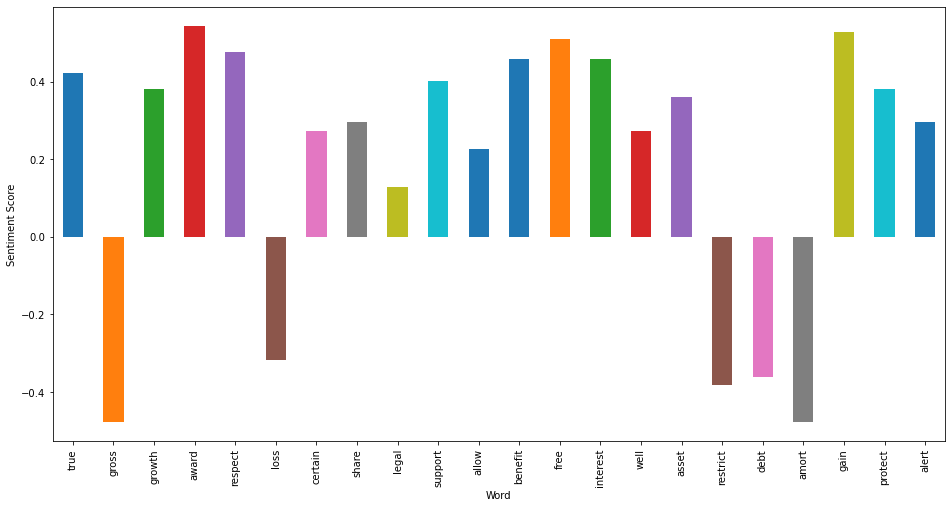

In [87]:
df.index = df['word']

plt.figure(figsize=(16,8))
df['compound'].plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Sentiment Score')
plt.show()

## Conclusion

- The above visualization code is grouping our dataset based on the word in the Uber news and then visualizing the average compound score of each word.

- We can see that most of compound scores are positive. Therefore, we can conclude that the Uber news reveal positive thoughts to the readers.